# ETF

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime,timedelta

In [4]:
data = pd.read_csv('data_0514_20260119.csv',encoding='CP949',dtype=str)

In [5]:
start = "2025-11-01"
end = "2026-02-01"

Kospi_prices = yf.download('^KS11',start=start,end=end)['Close']['^KS11']

weekly_return1 = Kospi_prices.pct_change(periods=5)[5:] * 100 

weekly_return1.dropna(inplace=True)

d:\Study_Finance\.venv\Lib\site-packages\yfinance\scrapers\history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed


In [ ]:
def RS_week(ticker):

    try:
        ETF_prices = yf.download(f'{ticker}.KS',start=start,end=end)['Close'][f'{ticker}.KS']
        
        weekly_return2 = ETF_prices.pct_change(periods=5)[5:] * 100

        weekly_return2.dropna(inplace=True)

        RS = weekly_return2 - weekly_return1

        return RS,ticker
    
    except:
        print(ticker)

d:\Study_Finance\.venv\Lib\site-packages\yfinance\scrapers\history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed


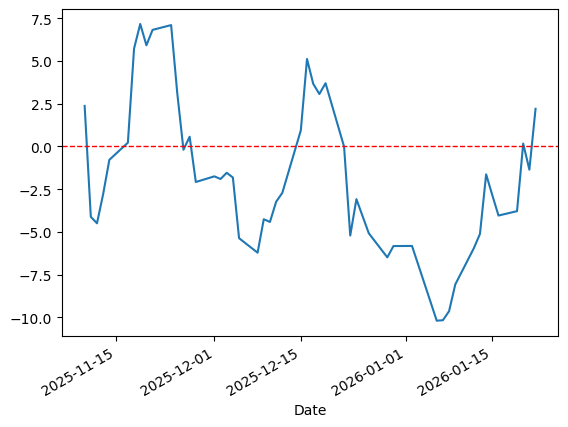

In [ ]:
corp_code = data['종목코드']
corp_list = []

for i in corp_code:
    st,ticker = RS_week(i)
    if st[-1]>=0:
        corp_list.append(ticker)

df = pd.DataFrame(corp_list,columns=['corp_list'])

In [ ]:
# st = RS_week('266410')

# st.plot()

# plt.axhline(0, color='red', linestyle='--', linewidth=1);

# plt.show();

In [ ]:
today_str = datetime.now().strftime('%Y-%m-%d')
yesterday = datetime.now() - timedelta(days=1)
yesterday_str = yesterday.strftime('%Y-%m-%d')

file_name = f'corp_list_{today_str}.xlsx'

df.to_excel(file_name, index=False)
print(f"✅ {file_name} 파일 생성 및 저장 완료!")

✅ corp_list_2026-01-22.xlsx 파일 생성 및 저장 완료!


In [ ]:
a= pd.read_csv(f'corp_list_{yesterday_str}.xlsx')
b= pd.read_csv(f'corp_list_{today_str}.xlsx')

In [15]:
# '기업코드'라는 컬럼명을 사용한다고 가정합니다.
# 실제 컬럼명에 맞춰 수정하세요.
codes_a = set(a['corp_list'])
codes_b = set(b['corp_list'])

# 2. 겹치는 기업코드 (교집합)
intersect_codes = codes_a & codes_b
print(f"겹치는 코드 개수: {len(intersect_codes)}")

# 3-2. b에만 있는 코드 (b - a)
only_b = codes_b - intersect_codes

print(f"22일에만 있는 코드: {len(only_b)}")

겹치는 코드 개수: 157
22일에만 있는 코드: 79


In [16]:
intersect_df = pd.DataFrame(only_b, columns=['기업코드'])
intersect_df

,기업코드
0,105010
1,446690
2,442260
3,289040
4,473490
...,...
74,266370
75,091170
76,0150K0
77,414780


In [17]:
# import sys
# !{sys.executable} -m pip install -U finance-datareader


코드(숫자),분류 명칭,설명 </br>
1,시장지수,"KOSPI 200, KOSDAQ 150 등 시장 대표 지수 추종" </br>
2,업종/섹터,"IT, 헬스케어, 금융, 에너지 등 특정 산업군 투자"</br>
3,채권,"국고채, 회사채, 단기자금(KOFR) 등 채권형"</br>
4,기타,"원자재(금, 구리), 통화(달러), 부동산 등"</br>
5,파생상품,"레버리지, 인버스 등 파생형 구조"</br>
6,해외지수,"S&P500, 나스닥100, 항셍 등 해외 시장 지수 추종"</br>
7,전략/배당,"고배당, 저변동성(로우볼), 가치주 등 특정 전략(Factor)"</br>


In [36]:
import FinanceDataReader as fdr
import pandas as pd

# 2. KRX 전체 종목 리스트(주식, ETF 포함) 가져오기
# 처음 한 번만 실행하면 됩니다.
df_etfs = fdr.StockListing('ETF/KR')

# 3. 데이터 결합 (기업코드 기준)
# Symbol(종목코드)과 Name(종목명) 컬럼을 매칭합니다.
result = pd.merge(intersect_df, df_etfs[['Symbol', 'Name','Category']], 
                  left_on='기업코드', right_on='Symbol', how='left')

# print(df_etfs.columns)
# 4. 결과 출력
# print("--- 금융상품 이름 매칭 결과 ---")
# print(result[['기업코드', 'Name','Category']])

result = result[['기업코드', 'Name','Category']]
result.to_csv(f'matching_result_{today_str}.xlsx',index=False)